# Exercise 3

## Occupancy grid mapping

The aim of this assignment is to implement a 2D occupancy grid mapping algorithm as described in the lecture. We provide data recorded by a robot using a 2D laser scanner in an indoor environment. 

The raw data is arranged in the following manner:

- `poses.data`: contains the **known** robot poses as it moves around the environment. Each line corresponds to the pose of the robot at a time instant

- `ranges.data`: contains 2d laser range measurements recorded by the robot. Each line corresponds to the range measurements taken from the corresponding robot poses.

---

### Log odds to probability

The occupancy calculations are usually performed using the log odds. We will need to convert between log odds and probabilities in this exercise. Implement the `logodds2prob` and `prob2logodds` functions. Verify that the conversion functions are correct for some test input. **[2.0]**

In [3]:
from importlib import reload
import math
import ex3
reload(ex3)
#test - it works
prob = .38
logodds = ex3.prob2logodds(prob)
print (logodds)
print(ex3.logodds2prob(logodds))

-0.4895482253187058
hello
0.38


---
### Inverse sensor model

The occupancy grid mapping relies on as inverse sensor model to update the occupancy of a cell in the grid. For this exercise, we consider a simple sensor model, where the occupancy of cell $m_i$ is $P_{occ}$ if the measurement $z_t$ falls in that cell, otherwise the occupancy is $P_{free}$. 

However, if the cell $m_i$ is not in the perception field, the occupancy will be $P_{prior}$.

Use the  following probabilities in the implementation:
$$P_{occ} = 0.9, P_{free} = 0.35, P_{prior} = 0.5 $$

Implement the inverse sensor model function and verify that it is correct for some test input. **[2.0]**

In [23]:
# Already implemented
import ex3
from importlib import reload
reload(ex3)

cell = [1,1]
endpoint = [9,9]
prob_occ = 0.9
prob_free = 0.35

ex3.inv_sensor_model(cell, endpoint, prob_occ, prob_free)
    

    

array([[1.  , 1.  , 0.35],
       [2.  , 2.  , 0.35],
       [3.  , 3.  , 0.35],
       [4.  , 4.  , 0.35],
       [5.  , 5.  , 0.35],
       [6.  , 6.  , 0.35],
       [7.  , 7.  , 0.35],
       [8.  , 8.  , 0.35],
       [9.  , 9.  , 0.9 ]])

---
### Occupancy grid mapping algorithm:

Implement the occupancy grid mapping algorithm as described in lecture slides. 

We provide some functions to make the implemntation easier.

- `ranges2cells` converts the raw measurements acquired by the robot (*ranges_raw*) into the correspoding cells of the gridmap.
- `poses2cells` converts the raw poses of the robot (*poses_raw*) into the correspoding cells of the gridmap.
- `bresenham` returns all the cells along a straigh line between two points in the gridmap.

Other parameters you may need in the implemntation are provided below.

Implement the `grid_mapping_with_known_poses` functionn and compute the resulting occupancy grid map using all the measurements provided in the data.

Plot the final occupancy gridmap using the `plot_gridmap` function. **[6.0]**


IndexError: index 400 is out of bounds for axis 1 with size 400

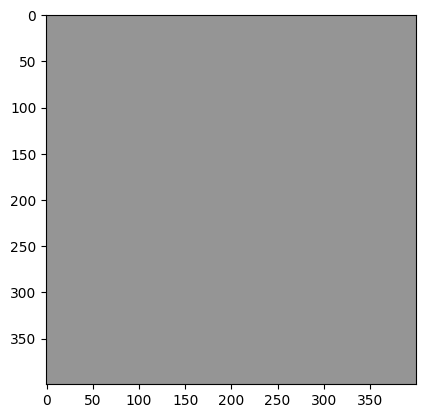

In [2]:
import ex3
import numpy as np
from importlib import reload
reload(ex3)

%matplotlib inline

map_size = 100
map_res = 0.25

prior = 0.50
prob_occ = 0.90
prob_free = 0.35

# load data
ranges_raw = np.loadtxt("ranges.data", delimiter=',', dtype='float')
poses_raw = np.loadtxt("poses.data", delimiter=',', dtype='float')

# initialize gridmap
occ_gridmap = ex3.init_gridmap(map_size, map_res)+prior
ex3.plot_gridmap(occ_gridmap)

ex3.grid_mapping_with_known_poses(ranges_raw, poses_raw, occ_gridmap, map_res, prob_occ, prob_free, prior)
#ex3.plot_gridmap(occ_gridmap)

In [ ]:
# 0 :  [[1002 1002 1002 1002 1002 1002 1003 1003 1005 1005 1005 1005 1006 1006
#   1006 1006 1007 1007 1007 1007 1007 1007 1007 1007 1007 1007 1007 1007
#   1008 1008 1008 1008 1008 1008 1007 1007 1008 1008 1015 1015 1016 1016
#   1016 1016 1017 1017 1018 1019 1018 1019 1017 1018 1018 1018 1018 1018
#   1018 1018 1013 1013 1013 1013 1013 1013 1013 1013 1013 1013 1013 1014
#   1008 1008 1008 1008 1014 1014 1014 1014 1014 1015 1015 1015 1015 1015
#   1015 1015 1015 1015 1015 1015 1016 1016 1016 1016 1016 1016 1016 1016
#   1016 1016 1017 1017 1017 1017 1012 1012 1010 1010 1010 1010 1017 1011
#   1018 1018 1018 1018 1019 1019 1012 1012 1019 1019 1011 1020 1010 1010
#   1020 1020 1020 1020 1021 1021 1027 1028 1026 1026 1025 1025 1025 1025
#   1024 1024 1023 1023 1023 1023 1023 1023 1023 1023 1023 1023 1022 1022
#   1022 1022 1021 1021 1021 1021 1021 1021 1018 1018 1017 1017 1017 1017
#   1017 1017 1016 1016 1016 1016 1016 1016 1016 1016 1015 1015 1015 1015
#   1015 1015 1015 1015 1014 1014 1014 1014 1014 1014 1014 1014 1013 1013
#   1013 1013 1013 1013 1013 1013 1012 1012 1012 1012 1012 1012 1012 1012
#   1012 1012 1011 1011 1011 1011 1011 1011 1012 1012 1012 1012 1012 1012
#   1012 1012 1012 1012 1013 1013 1015 1015 1017 1017 1021 1021 1016 1016
#   1016 1016 1016 1015 1015 1015 1015 1015 1015 1015 1028 1028 1027 1027
#   1026 1026 1006 1006 1006 1005 1005 1005 1005 1005 1005 1005 1005 1005
#   1006 1006 1006 1006 1006 1005 1005 1005 1005 1005 1005 1005 1005 1004
#   1004 1004 1004 1004 1004 1004 1004 1003 1003 1003 1003 1003 1003 1003
#   1003 1003 1002 1002 1002 1002 1002 1002 1002 1002 1002 1002 1001 1001
#   1001 1001 1001 1001 1001 1001 1001 1001 1000 1000 1000 1000 1000 1000]
#  [ 994  994  994  994  994  994  994  994  989  989  988  989  988  988
#    988  988  987  987  987  988  988  988  988  988  988  988  988  989
#    989  989  989  989  989  989  991  990  989  990  982  982  980  981
#    981  981  981  981  980  980  981  980  982  982  983  983  983  983
#    983  983  989  989  989  989  989  989  990  990  990  990  990  990
#    994  994  994  994  991  991  991  991  991  991  991  992  992  992
#    992  992  992  992  992  993  993  993  993  993  993  993  993  994
#    994  994  994  994  994  994  996  996  997  997  997  997  995  997
#    995  996  996  996  996  996  998  998  996  997  998  997  998  999
#    997  998  998  998  998  998  998  998  999  999  999  999  999 1000
#   1000 1000 1000 1001 1001 1001 1001 1001 1001 1002 1002 1002 1002 1002
#   1003 1003 1003 1003 1003 1003 1004 1004 1003 1004 1004 1004 1004 1004
#   1004 1004 1004 1004 1005 1005 1005 1005 1005 1005 1005 1005 1005 1006
#   1006 1006 1006 1006 1006 1006 1006 1006 1006 1007 1007 1007 1007 1007
#   1007 1007 1007 1007 1007 1007 1007 1008 1008 1008 1008 1008 1008 1008
#   1008 1008 1008 1008 1008 1009 1009 1009 1010 1010 1010 1010 1010 1011
#   1011 1011 1011 1011 1012 1012 1015 1015 1018 1018 1022 1022 1018 1018
#   1019 1019 1019 1019 1019 1019 1020 1020 1020 1020 1038 1039 1039 1039
#   1038 1039 1009 1009 1009 1009 1009 1009 1009 1009 1009 1009 1010 1010
#   1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012
#   1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012
#   1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012
#   1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1012 1009 1008]]